In [1]:
from context import speechact
import speechact.classifier.embedding as emb
import speechact.classifier.base as b
import speechact.evaluation as evaluation
import speechact.corpus as corp
import speechact.annotate as anno
import matplotlib.pyplot as plt

/Users/danieltufvesson/Documents/KogVet Programmet/Kanditatarbete/Meningstyper/Code/Speech-Act-Classifier/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
labels = [act.value for act in emb.SPEECH_ACTS]

# Load upsampled data.
corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-upsampled.conllu.bz2')
test_corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-test-upsampled.conllu.bz2')
train_corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-train-upsampled.conllu.bz2')

results = {}

In [3]:

def plot_loss_histories(loss_history: list[float], dev_loss_history: list[float]):
    epochs = range(1, len(loss_history) + 1)
    plt.plot(epochs, loss_history, label='Training Loss')
    plt.plot(epochs, dev_loss_history, label='Dev Loss')
    plt.title('Training and Dev Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [4]:
def train_model(corpus: corp.Corpus, dev_corpus: corp.Corpus, model_name: str):
    print('Load classifier')
    classifier = emb.EmbeddingClassifier()

    print('Load dataset')
    dataset = emb.CorpusDataset(corpus)
    dev_dataset = emb.CorpusDataset(dev_corpus)

    loss_history = []
    dev_loss_history = []
    
    print(f'Train classifier: {model_name}')
    classifier.train(dataset, 32, loss_history=loss_history, dev_loss_history=dev_loss_history,
                     dev_data=dev_dataset)
    classifier.save(model_name)

    plot_loss_histories(loss_history, dev_loss_history)

In [5]:
def evaluate_model(corpus: corp.Corpus, model_name: str):
    print('Load classifier')
    classifier = emb.EmbeddingClassifier()
    classifier.load(model_name)

    print(f'Evaluate classifier: {model_name}')
    return evaluation.evaluate(
        corpus,
        classifier,
        labels,
        draw_conf_matrix=True
    )

# DEV: 80% Training Data (balanced)

Load classifier
Load dataset
Train classifier: ../models/neural/hidden_256/dev-model-bal-80.pth


Training: epoch 1/10", unit="batch: 100%|██████████| 137/137 [00:35<00:00,  3.89it/s]


Epoch 1/10, Loss: 0.8524675210461999


Eval on dev data: epoch 1/10", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.28it/s]


Epoch 1/10, Dev loss: 0.7079363132224363


Training: epoch 2/10", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.25it/s]


Epoch 2/10, Loss: 0.4340715835781863


Eval on dev data: epoch 2/10", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.36it/s]


Epoch 2/10, Dev loss: 0.677171313587357


Training: epoch 3/10", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.25it/s]


Epoch 3/10, Loss: 0.32387718688832584


Eval on dev data: epoch 3/10", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.28it/s]


Epoch 3/10, Dev loss: 0.6783600396969739


Training: epoch 4/10", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.70it/s]


Epoch 4/10, Loss: 0.251812215812885


Eval on dev data: epoch 4/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.55it/s]


Epoch 4/10, Dev loss: 0.752514404409072


Training: epoch 5/10", unit="batch: 100%|██████████| 137/137 [00:39<00:00,  3.47it/s]


Epoch 5/10, Loss: 0.20064068509496913


Eval on dev data: epoch 5/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.77it/s]


Epoch 5/10, Dev loss: 0.7963271982529584


Training: epoch 6/10", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.63it/s]


Epoch 6/10, Loss: 0.16359348886095695


Eval on dev data: epoch 6/10", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  3.79it/s]


Epoch 6/10, Dev loss: 0.8466222461532144


Training: epoch 7/10", unit="batch: 100%|██████████| 137/137 [00:37<00:00,  3.70it/s]


Epoch 7/10, Loss: 0.13057286702912219


Eval on dev data: epoch 7/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.72it/s]


Epoch 7/10, Dev loss: 0.8811752366669038


Training: epoch 8/10", unit="batch: 100%|██████████| 137/137 [00:38<00:00,  3.60it/s]


Epoch 8/10, Loss: 0.10658542333293135


Eval on dev data: epoch 8/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.75it/s]


Epoch 8/10, Dev loss: 0.9224661413361045


Training: epoch 9/10", unit="batch: 100%|██████████| 137/137 [00:39<00:00,  3.51it/s]


Epoch 9/10, Loss: 0.0861490765708859


Eval on dev data: epoch 9/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.73it/s]


Epoch 9/10, Dev loss: 0.9363807426655993


Training: epoch 10/10", unit="batch: 100%|██████████| 137/137 [00:38<00:00,  3.59it/s]


Epoch 10/10, Loss: 0.0730489126957246


Eval on dev data: epoch 10/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.73it/s]

Epoch 10/10, Dev loss: 1.0118712107924854
Training complete
Saving model to "../models/neural/hidden_256/dev-model-bal-80.pth"


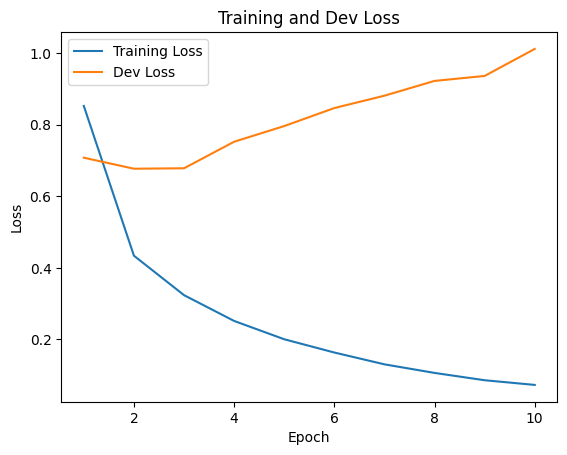

Load classifier
Loading model from "../models/neural/hidden_256/dev-model-bal-80.pth"
Evaluate classifier: ../models/neural/hidden_256/dev-model-bal-80.pth
Accuracy: 0.7283834586466166
Classification report:
              precision    recall  f1-score   support

   assertion       0.51      0.82      0.63       266
    question       0.90      0.77      0.83       266
   directive       0.89      0.60      0.72       266
  expressive       0.86      0.72      0.78       266

    accuracy                           0.73      1064
   macro avg       0.79      0.73      0.74      1064
weighted avg       0.79      0.73      0.74      1064

Confusion matrix:
            assertion  question  directive  expressive
assertion         218         8         12          28
question           53       206          3           4
directive          93        13        160           0
expressive         67         3          5         191


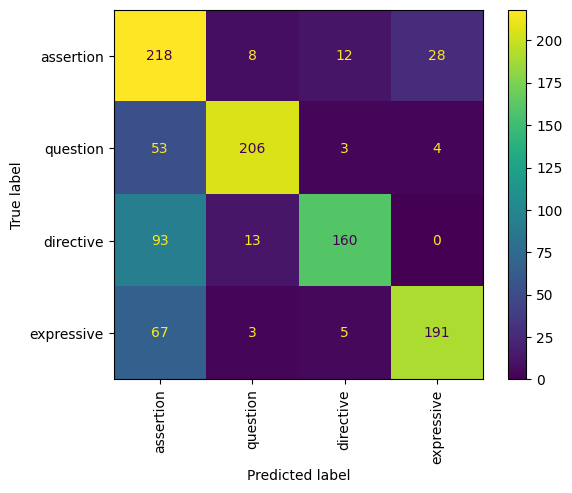

In [6]:
train_model(train_corpus, test_corpus, model_name='../models/neural/hidden_256/dev-model-bal-80.pth')
results['dev-model-bal-80'] = evaluate_model(
    test_corpus, model_name='../models/neural/hidden_256/dev-model-bal-80.pth')

# DEV: 80% Training Data (balanced) no hidden

Load classifier
Load dataset
Train classifier: ../models/neural/no-hidden/dev-model-bal-80.pth


Training: epoch 1/10", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.25it/s]


Epoch 1/10, Loss: 1.2217694355623565


Eval on dev data: epoch 1/10", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]


Epoch 1/10, Dev loss: 1.0920881401090061


Training: epoch 2/10", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.22it/s]


Epoch 2/10, Loss: 0.9961494546737114


Eval on dev data: epoch 2/10", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.40it/s]


Epoch 2/10, Dev loss: 0.9524117795860066


Training: epoch 3/10", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.27it/s]


Epoch 3/10, Loss: 0.8756261502739286


Eval on dev data: epoch 3/10", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.38it/s]


Epoch 3/10, Dev loss: 0.8811042361399707


Training: epoch 4/10", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.25it/s]


Epoch 4/10, Loss: 0.7950828105863863


Eval on dev data: epoch 4/10", unit="batch: 100%|██████████| 34/34 [00:07<00:00,  4.40it/s]


Epoch 4/10, Dev loss: 0.829322569510516


Training: epoch 5/10", unit="batch: 100%|██████████| 137/137 [00:32<00:00,  4.24it/s]


Epoch 5/10, Loss: 0.7349909387365745


Eval on dev data: epoch 5/10", unit="batch: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]


Epoch 5/10, Dev loss: 0.8045218639514026


Training: epoch 6/10", unit="batch: 100%|██████████| 137/137 [00:38<00:00,  3.59it/s]


Epoch 6/10, Loss: 0.692254577675005


Eval on dev data: epoch 6/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.54it/s]


Epoch 6/10, Dev loss: 0.7804599737419802


Training: epoch 7/10", unit="batch: 100%|██████████| 137/137 [00:38<00:00,  3.52it/s]


Epoch 7/10, Loss: 0.6577301419129337


Eval on dev data: epoch 7/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]


Epoch 7/10, Dev loss: 0.7502287310712478


Training: epoch 8/10", unit="batch: 100%|██████████| 137/137 [00:38<00:00,  3.58it/s]


Epoch 8/10, Loss: 0.6222932656315991


Eval on dev data: epoch 8/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]


Epoch 8/10, Dev loss: 0.7387669191640966


Training: epoch 9/10", unit="batch: 100%|██████████| 137/137 [00:38<00:00,  3.55it/s]


Epoch 9/10, Loss: 0.5970720509543036


Eval on dev data: epoch 9/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.64it/s]


Epoch 9/10, Dev loss: 0.7321467609966502


Training: epoch 10/10", unit="batch: 100%|██████████| 137/137 [00:40<00:00,  3.35it/s]


Epoch 10/10, Loss: 0.5746370556145689


Eval on dev data: epoch 10/10", unit="batch: 100%|██████████| 34/34 [00:09<00:00,  3.57it/s]

Epoch 10/10, Dev loss: 0.7255508180926827
Training complete
Saving model to "../models/neural/no-hidden/dev-model-bal-80.pth"


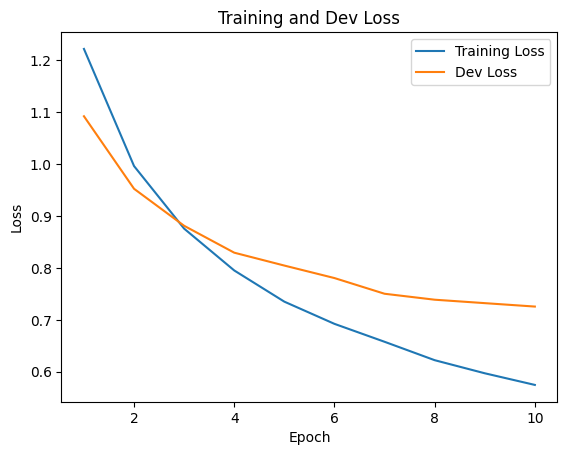

Load classifier
Loading model from "../models/neural/no-hidden/dev-model-bal-80.pth"
Evaluate classifier: ../models/neural/no-hidden/dev-model-bal-80.pth
Accuracy: 0.7518796992481203
Classification report:
              precision    recall  f1-score   support

   assertion       0.65      0.69      0.67       266
    question       0.75      0.77      0.76       266
   directive       0.82      0.90      0.86       266
  expressive       0.80      0.65      0.71       266

    accuracy                           0.75      1064
   macro avg       0.75      0.75      0.75      1064
weighted avg       0.75      0.75      0.75      1064

Confusion matrix:
            assertion  question  directive  expressive
assertion         183        24         22          37
question           45       205          9           7
directive           0        26        240           0
expressive         55        17         22         172


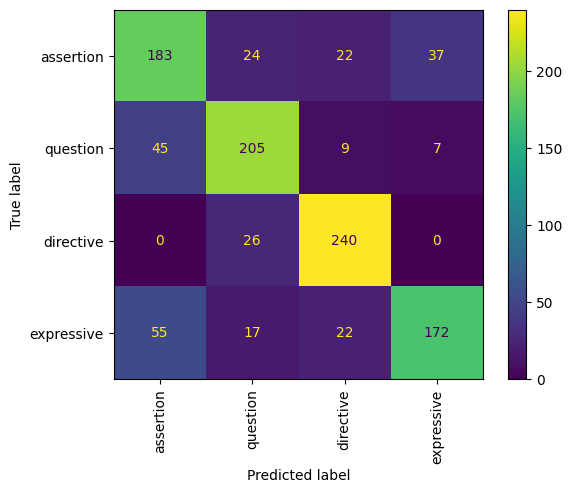

In [7]:
train_model(train_corpus, test_corpus, model_name='../models/neural/no-hidden/dev-model-bal-80.pth')
results['dev-model-bal-80'] = evaluate_model(
    test_corpus, model_name='../models/neural/no-hidden/dev-model-bal-80.pth')